## ETF Portfolio - Construction & Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")
import yfinance as yf
from seaborn import heatmap

### Section 1 - Correlation Analysis

[*********************100%***********************]  10 of 10 completed


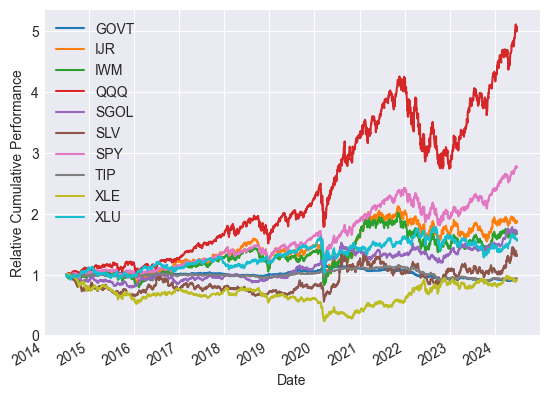

In [2]:
tickers = ['SPY','QQQ','SGOL','SLV','IWM','IJR','GOVT','TIP','XLE','XLU']
start_date = '2014-7-1'
end_date = '2024-7-1'

df = yf.download(tickers,start_date,end_date)['Close']
(df/df.iloc[0,:]).plot()
# plt.yscale('log')
plt.ylabel('Relative Cumulative Performance')
plt.show()

In [3]:
df.shape

(2516, 10)

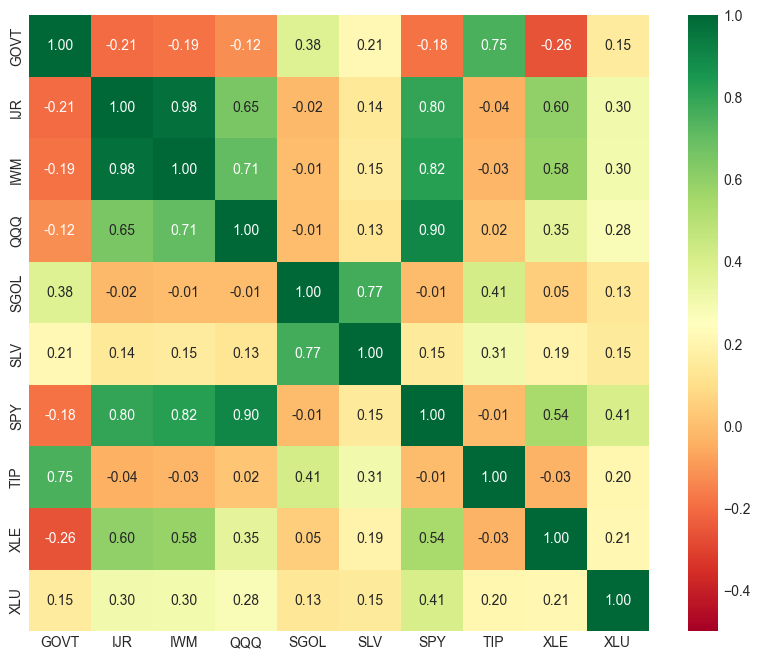

In [4]:
ret_df = df/df.shift()-1
ret_df.dropna(inplace=True)
corr = ret_df.corr(method='spearman')
# msk = np.triu(corr)
plt.figure(figsize=(10,8))
heatmap(corr,vmin=-0.5,vmax=1,cmap='RdYlGn',annot=True,fmt=".2f")#mask=msk,)
plt.show()

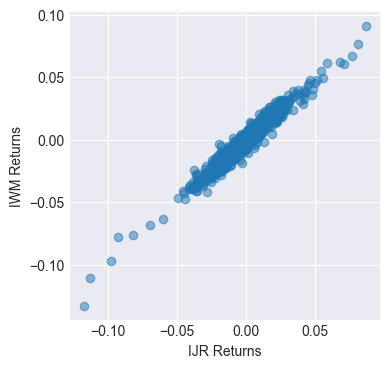

In [5]:
fig,axs = plt.subplots(figsize=(4,4))
axs.scatter(ret_df['IJR'],ret_df['IWM'],alpha=0.5)
plt.ylabel('IWM Returns')
plt.xlabel('IJR Returns')
plt.show()

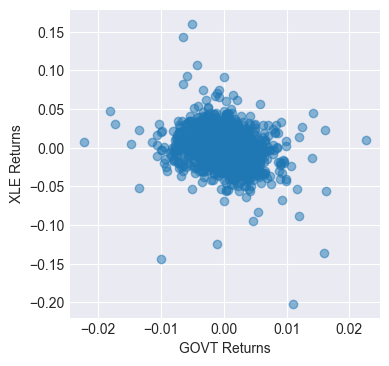

In [6]:
fig,axs = plt.subplots(figsize=(4,4))
axs.scatter(ret_df['GOVT'],ret_df['XLE'],alpha=0.5)
plt.ylabel('XLE Returns')
plt.xlabel('GOVT Returns')
plt.show()

In [7]:
ret_df.describe()

,GOVT,IJR,IWM,QQQ,SGOL,SLV,SPY,TIP,XLE,XLU
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,-0.000031,0.000349,0.000308,0.000736,0.000252,0.000248,0.000466,-0.000021,0.000143,0.000250
std,0.003209,0.013949,0.014011,0.013587,0.008915,0.016639,0.011093,0.003795,0.018922,0.012165
min,-0.022246,-0.117687,-0.132669,-0.119788,-0.053388,-0.135926,-0.109424,-0.028662,-0.201412,-0.113577
25%,-0.001795,-0.006605,-0.006889,-0.005035,-0.004727,-0.007719,-0.003788,-0.001868,-0.008675,-0.005700
50%,0.000000,0.000606,0.000768,0.001148,0.000378,0.000000,0.000545,0.000089,0.000160,0.000827
75%,0.001754,0.007644,0.007877,0.007584,0.004977,0.008331,0.005783,0.001945,0.009131,0.006402
max,0.022576,0.086948,0.091491,0.084706,0.053476,0.091429,0.090603,0.044537,0.160373,0.127934


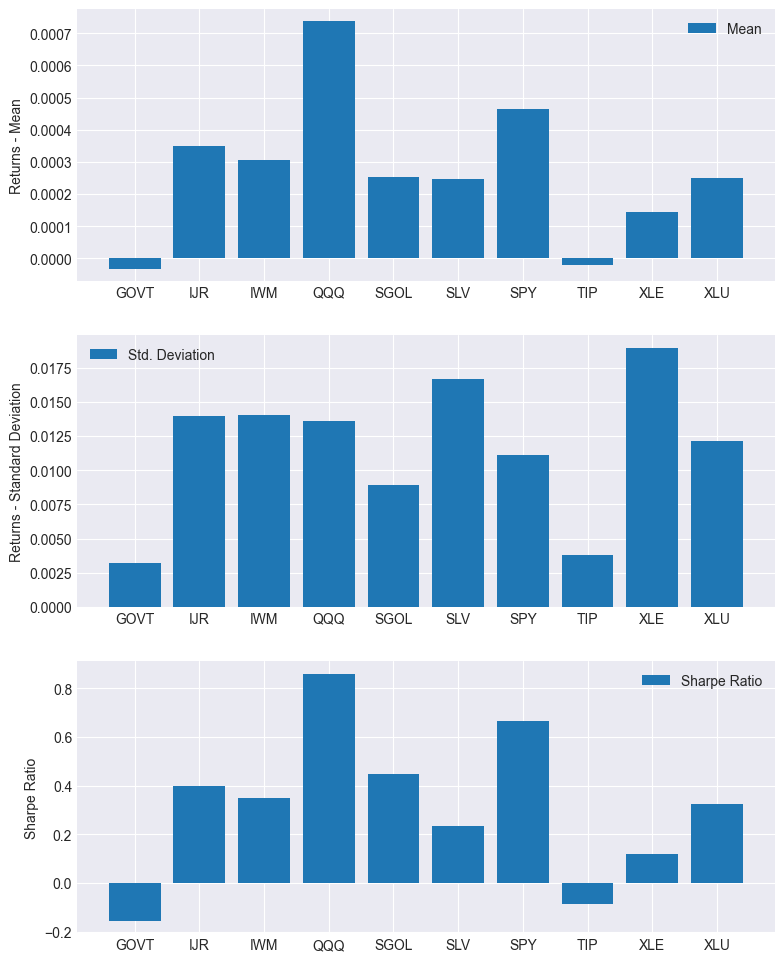

In [8]:
fig,axs = plt.subplots(3,1,figsize=(9,12))
axs[0].bar(x=ret_df.columns,height=ret_df.mean(),label='Mean')
axs[0].set_ylabel('Returns - Mean')
axs[0].legend()
axs[1].bar(x=ret_df.columns,height=ret_df.std(),label='Std. Deviation')
axs[1].set_ylabel('Returns - Standard Deviation')
axs[1].legend()
axs[2].bar(x=ret_df.columns,height=ret_df.mean()/ret_df.std()*np.sqrt(252),label='Sharpe Ratio')
axs[2].set_ylabel('Sharpe Ratio')
axs[2].legend()
plt.show()

### Section 2 - Building A Simple 2-ETF Portfolio

In [9]:
slctd = ret_df.copy()
slctd = slctd.loc[:,['QQQ','SGOL']]
slctd.tail()

,QQQ,SGOL
Date,,
2024-06-24,-0.012953,0.004509
2024-06-25,0.011436,-0.004937
2024-06-26,0.002065,-0.009021
2024-06-27,0.002581,0.010924
2024-06-28,-0.005191,0.000450


In [10]:
prptn = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
l = len(prptn)

In [11]:
for i in range(l):
    slctd[f'Portfolio {i+1}'] = (prptn[i] * slctd['QQQ']) + ((1-prptn[i])*slctd['SGOL'])

slctd.tail()

,QQQ,SGOL,Portfolio 1,Portfolio 2,Portfolio 3,Portfolio 4,Portfolio 5,Portfolio 6,Portfolio 7,Portfolio 8,Portfolio 9
Date,,,,,,,,,,,
2024-06-24,-0.012953,0.004509,0.002762,0.001016,-0.000730,-0.002476,-0.004222,-0.005969,-0.007715,-0.009461,-0.011207
2024-06-25,0.011436,-0.004937,-0.003300,-0.001663,-0.000025,0.001612,0.003249,0.004886,0.006524,0.008161,0.009798
2024-06-26,0.002065,-0.009021,-0.007913,-0.006804,-0.005695,-0.004587,-0.003478,-0.002369,-0.001261,-0.000152,0.000957
2024-06-27,0.002581,0.010924,0.010090,0.009255,0.008421,0.007587,0.006753,0.005918,0.005084,0.004250,0.003416
2024-06-28,-0.005191,0.000450,-0.000114,-0.000678,-0.001242,-0.001806,-0.002370,-0.002934,-0.003499,-0.004063,-0.004627


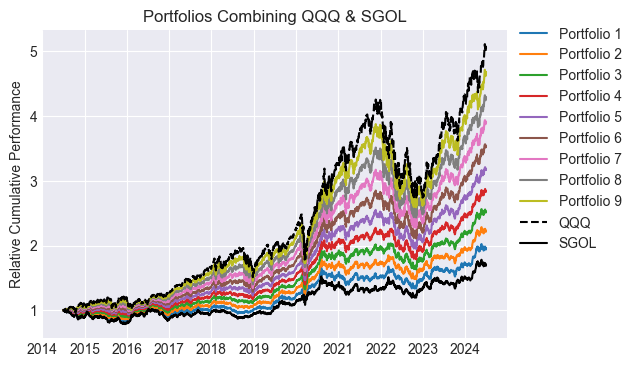

In [12]:
fig,axs = plt.subplots(figsize=(6,4))
axs.plot((1+slctd.iloc[:,2:]).cumprod(),label=slctd.columns[2:])
axs.plot((1+slctd.loc[:,'QQQ']).cumprod(),c='black',linestyle='dashed',label='QQQ')
plt.ylabel('Relative Cumulative Performance')
axs.plot((1+slctd.loc[:,'SGOL']).cumprod(),c='black',label='SGOL')
plt.title('Portfolios Combining QQQ & SGOL')
plt.legend(bbox_to_anchor=[1,1.05])
plt.show()

In [13]:
prptn = [1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
smmry = pd.DataFrame({'SGOL Proportion': [1-i for i in prptn],
                     'QQQ Proportion': prptn,
                     'Returns': slctd.mean() * 252,
                     'Volatility': slctd.std() * np.sqrt(252),
                     'Sharpe Ratio': slctd.mean()/slctd.std()*np.sqrt(252),
                     'Cumulative Returns':(1+slctd).cumprod().iloc[-1,:]})
smmry.sort_values(by='SGOL Proportion',ascending=True,inplace=True)
smmry

,SGOL Proportion,QQQ Proportion,Returns,Volatility,Sharpe Ratio,Cumulative Returns
QQQ,0.0,1.0,0.185574,0.215685,0.860394,5.046450
Portfolio 9,0.1,0.9,0.173372,0.195121,0.888537,4.661454
Portfolio 8,0.2,0.8,0.161170,0.175820,0.916673,4.278024
Portfolio 7,0.3,0.7,0.148967,0.158247,0.941360,3.900807
Portfolio 6,0.4,0.6,0.136765,0.143039,0.956140,3.533929
Portfolio 5,0.5,0.5,0.124563,0.131022,0.950702,3.180943
Portfolio 4,0.6,0.4,0.112361,0.123134,0.912504,2.844793
Portfolio 3,0.7,0.3,0.100158,0.120192,0.833322,2.527810
Portfolio 2,0.8,0.2,0.087956,0.122551,0.717713,2.231714
Portfolio 1,0.9,0.1,0.075754,0.129923,0.583069,1.957647


In [14]:
smmry.iloc[smmry['Sharpe Ratio'].argmax(),:]

SGOL Proportion       0.400000
QQQ Proportion        0.600000
Returns               0.136765
Volatility            0.143039
Sharpe Ratio          0.956140
Cumulative Returns    3.533929
Name: Portfolio 6, dtype: float64

In [15]:
smmry.loc[['QQQ','SGOL','Portfolio 4'],:]

,SGOL Proportion,QQQ Proportion,Returns,Volatility,Sharpe Ratio,Cumulative Returns
QQQ,0.0,1.0,0.185574,0.215685,0.860394,5.046450
SGOL,1.0,0.0,0.063552,0.141527,0.449044,1.706212
Portfolio 4,0.6,0.4,0.112361,0.123134,0.912504,2.844793


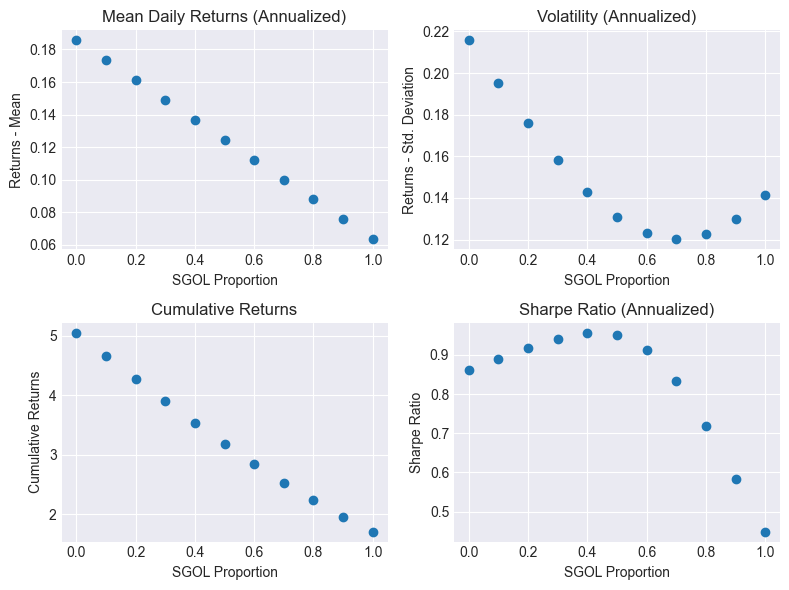

In [16]:
fig,axs = plt.subplots(2,2,figsize=(8,6))
axs[0,0].scatter(smmry['SGOL Proportion'],smmry['Returns'])
axs[0,0].set_xlabel('SGOL Proportion')
axs[0,0].set_ylabel('Returns - Mean')
axs[0,0].set_title('Mean Daily Returns (Annualized)')
axs[0,1].scatter(smmry['SGOL Proportion'],smmry['Volatility'])
axs[0,1].set_xlabel('SGOL Proportion')
axs[0,1].set_ylabel('Returns - Std. Deviation')
axs[0,1].set_title('Volatility (Annualized)')
axs[1,0].scatter(smmry['SGOL Proportion'],smmry['Cumulative Returns'])
axs[1,0].set_xlabel('SGOL Proportion')
axs[1,0].set_ylabel('Cumulative Returns')
axs[1,0].set_title('Cumulative Returns')
axs[1,1].scatter(smmry['SGOL Proportion'],smmry['Sharpe Ratio'])
axs[1,1].set_xlabel('SGOL Proportion')
axs[1,1].set_ylabel('Sharpe Ratio')
axs[1,1].set_title('Sharpe Ratio (Annualized)')
plt.tight_layout()
plt.show()

### Section 3 - Optimizing A Multi-Asset Portfolio using Monte-Carlo Simulations
The inspiration came from [this](https://mishraayush447.medium.com/portfolio-optimization-using-python-b8d2b64e520e) article.

In [17]:
port = ret_df.copy()
port = port.loc[:,['QQQ','TIP','IJR','SGOL','XLU','XLE']]
port.tail()

,QQQ,TIP,IJR,SGOL,XLU,XLE
Date,,,,,,
2024-06-24,-0.012953,0.000561,0.006829,0.004509,0.005044,0.017047
2024-06-25,0.011436,0.001214,-0.008572,-0.004937,-0.009464,0.002301
2024-06-26,0.002065,-0.002984,0.000475,-0.009021,-0.004198,-0.009837
2024-06-27,0.002581,0.001871,0.004748,0.010924,0.001744,0.002318
2024-06-28,-0.005191,-0.003081,0.008129,0.000450,-0.011174,0.003855


In [18]:
ite = 5000
wghts = np.zeros((ite,len(port.columns)))
rtrns = np.zeros(ite)
vltly = np.zeros(ite)
shrpe = np.zeros(ite)

In [19]:
np.random.seed(68)

for k in range(ite):

    w = np.array(np.random.random(len(port.columns)))
    adj_w = w / np.sum(w)
    wghts[k] = adj_w

    rtrns[k] = np.sum(port.mean() * adj_w * 252)
    vltly[k] = np.sqrt(np.dot(adj_w.T, np.dot(port.cov()*252,adj_w)))
    shrpe[k] = rtrns[k] / vltly[k]

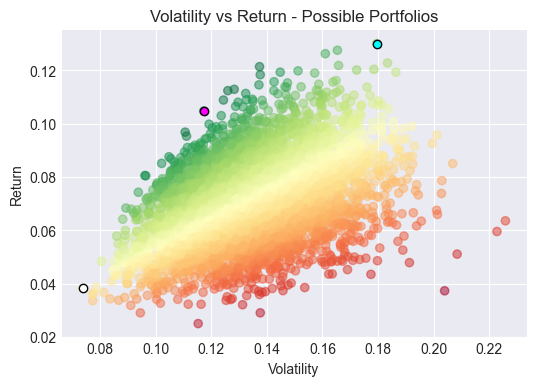

In [20]:
fig,axs = plt.subplots(figsize=(6,4))
axs.scatter(vltly,rtrns,c=shrpe,cmap='RdYlGn',alpha=0.5)
axs.scatter(vltly[shrpe.argmax()],rtrns[shrpe.argmax()],c='magenta',edgecolor='black')
axs.scatter(vltly[rtrns.argmax()],rtrns[rtrns.argmax()],c='cyan',edgecolor='black')
axs.scatter(vltly[vltly.argmin()],rtrns[vltly.argmin()],c='white',edgecolor='black')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Volatility vs Return - Possible Portfolios')
plt.show()

In [21]:
shrpe.max()

0.8925954346041849

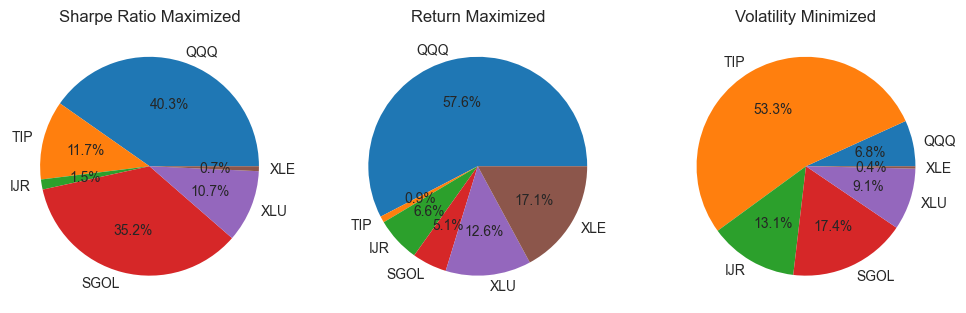

In [22]:
fig,axs = plt.subplots(1,3,figsize=(12,6))
axs[0].pie(wghts[shrpe.argmax()],autopct='%1.1f%%',labels=port.columns[:10])
axs[0].set_title('Sharpe Ratio Maximized')
axs[1].pie(wghts[rtrns.argmax()],autopct='%1.1f%%',labels=port.columns[:10])
axs[1].set_title('Return Maximized')
axs[2].pie(wghts[vltly.argmin()],autopct='%1.1f%%',labels=port.columns[:10])
axs[2].set_title('Volatility Minimized')
plt.show()

In [23]:
port['Portfolio'] = (wghts[shrpe.argmax()] * port).sum(axis=1)

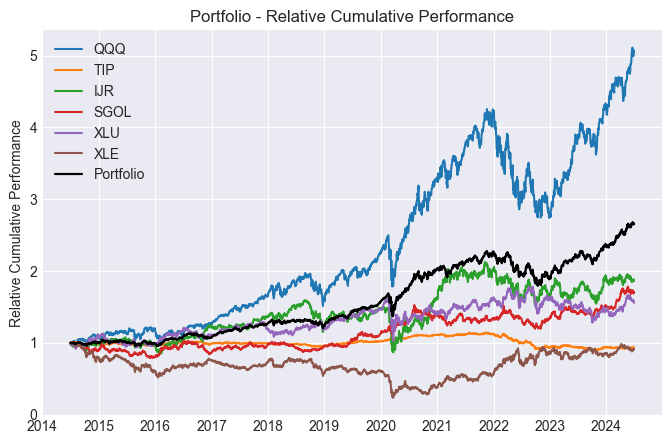

In [24]:
fig,axs = plt.subplots(figsize=(8,5))
axs.plot((1 + port.iloc[:,:len(port.columns)-1]).cumprod(),label=port.columns[:-1])
axs.plot((1 + port['Portfolio']).cumprod(),c='black',linewidth=1.6,label='Portfolio')
# plt.yscale('log')
plt.ylabel('Relative Cumulative Performance')
plt.legend()
plt.title('Portfolio - Relative Cumulative Performance')
plt.show()

### Section 4 - Momentum-Based Rebalancing
#### 4.1 Sector Rotation

[*********************100%***********************]  11 of 11 completed


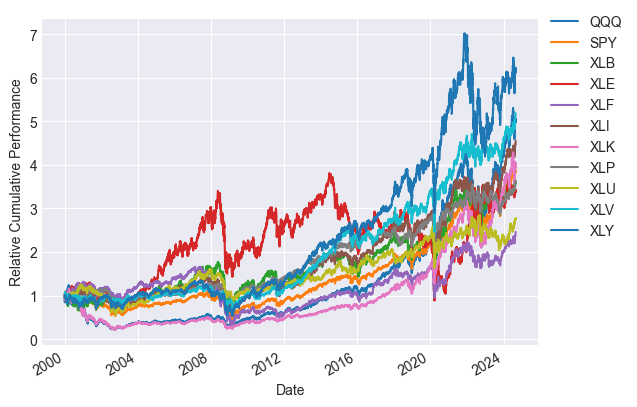

In [ ]:
tickers = ['XLU','XLE','XLK','XLB','XLP','XLY','XLI','XLV','XLF','SPY','QQQ']
# Note: XLC and XLRE are not included because there wasn't enough data from 2004

# can try another random selection of stocks & ETFs
# tickers = ['PG','GE','WM','KR','C','BA','JPM','XOM','KO','PEP','MO','SPY','QQQ']

start_date = '2000-1-1'
end_date = '2024-9-1'

df = yf.download(tickers,start_date,end_date)['Close']
(df/df.iloc[0,:]).plot()
plt.ylabel('Relative Cumulative Performance')
plt.legend(bbox_to_anchor=(1,1.05))
plt.show()

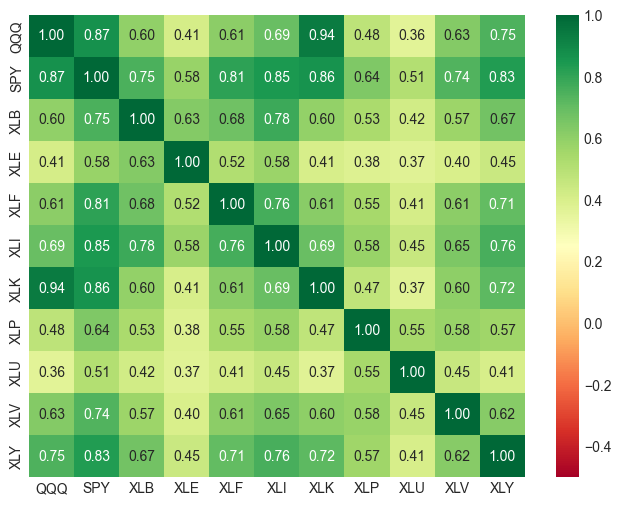

In [26]:
ret_df = df/df.shift()-1
ret_df.dropna(inplace=True)
corr = ret_df.corr(method='spearman')
# msk = np.triu(corr)
plt.figure(figsize=(8,6))
heatmap(corr,vmin=-0.5,vmax=1,cmap='RdYlGn',annot=True,fmt=".2f")#mask=msk,)
plt.show()

In [27]:
# define rebalancing frequency & the number of ETFs to keep
priod = 126
N = 3

# create an array full of NaNs
wghts = np.empty((len(ret_df),len(ret_df.columns)))
wghts[:] = np.nan

# set equal weights for all assets at the beginning
wghts[0,:] = len(ret_df.columns) * [1/len(ret_df.columns)]

# a dict to keep the name selected ETFs
hldngs = {}

for p in range(int(len(ret_df)/priod)):

    # calculate cumulative returns every period
    cum_ret = (1 + ret_df.iloc[(p*priod):((p+1)*priod),:]).cumprod()

    # select the top N-performing ETFs within the period
    fnl_ret = cum_ret.iloc[-1,:].copy()
    slctd = np.sort(fnl_ret)
    slctd = slctd[::-1]
    slctd = slctd[0:N]
    
    # add top N-performing ETF name to hldngs dict
    hldngs[p] = fnl_ret.nlargest(N).index.to_list()

    # anything less than the top N is discarded
    for k in range(len(ret_df.columns)):
        if cum_ret.iloc[-1,k] < slctd.min():
            cum_ret.iloc[-1,k] = 0

    # map performance onto weights
    wghts[(p+1)*priod,:] = cum_ret.iloc[-1,:].copy()

    # equal weighting among the top N performers for the next period
    for k in range(len(ret_df.columns)):
        if wghts[(p+1)*priod,k] != 0:
            wghts[(p+1)*priod,k] = 1/N

In [28]:
hldngs = pd.DataFrame(hldngs).T
cols = [np.nan for i in range(N)]
for n in range(N):
    cols[n] = f'ETF {n+1}'
hldngs.columns = cols
hldngs

,ETF 1,ETF 2,ETF 3
0,XLE,XLP,XLF
1,XLF,XLU,XLP
2,XLV,XLY,XLB
3,XLY,XLP,XLB
4,XLB,XLE,XLY
5,XLV,QQQ,XLK
6,QQQ,XLY,XLK
7,XLB,XLK,XLI
8,XLE,XLP,XLI
9,XLU,XLY,XLE


In [29]:
# process weights array into a dataframe & forward fill
wghts_df = pd.DataFrame(wghts,columns=ret_df.columns,index=ret_df.index)
wghts_df.ffill(inplace=True)

# calculate the returns for a momentum & equal weights portfolios
mmnt_port = (wghts_df.to_numpy() * ret_df).sum(axis=1)
eql_port = (wghts[0,:] * ret_df).sum(axis=1)

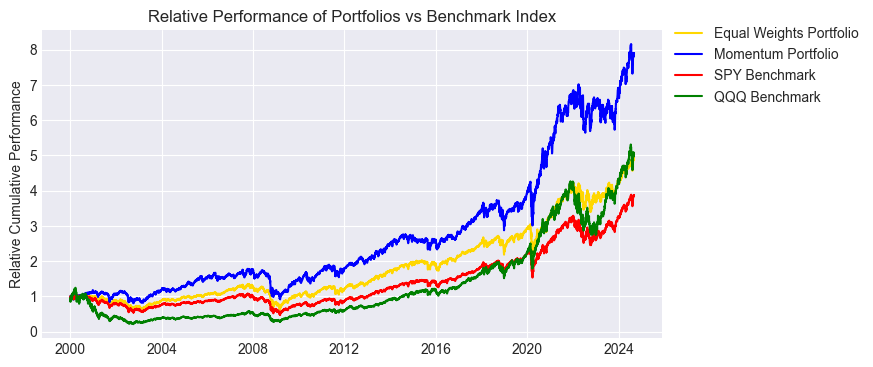

In [30]:
fig,axs = plt.subplots(figsize=(8,4))
# axs.plot((1 + ret_df.iloc[:,2:]).cumprod(),label=ret_df.columns[2:],alpha=0.3)

axs.plot((1 + eql_port).cumprod(),c='gold',label='Equal Weights Portfolio')
axs.plot((1 + mmnt_port).cumprod(),c='blue',label='Momentum Portfolio')

axs.plot((1 + ret_df.loc[:,'SPY']).cumprod(),c='red',label='SPY Benchmark')
axs.plot((1 + ret_df.loc[:,'QQQ']).cumprod(),c='green',label='QQQ Benchmark')
plt.ylabel('Relative Cumulative Performance')
plt.legend(bbox_to_anchor=(1,1.05))
plt.title('Relative Performance of Portfolios vs Benchmark Index')
plt.show()

In [31]:
smmry = pd.DataFrame({

    'Portfolio': ['Momentum','Equal Weights','SPY Benchmark','QQQ Benchmark'],

    'Cumulative Performance': [
        (1 + mmnt_port).cumprod()[-1],
        (1 + eql_port).cumprod()[-1],
        (1 + ret_df.loc[:,'SPY']).cumprod()[-1],
        (1 + ret_df.loc[:,'QQQ']).cumprod()[-1]
        ],

    'Return (Annualized)': [
        mmnt_port.mean() * 252,
        eql_port.mean() * 252,
        ret_df.loc[:,'SPY'].mean() * 252,
        ret_df.loc[:,'QQQ'].mean() * 252
        ],

    'Volatility (Annualized)': [
        mmnt_port.std() * np.sqrt(252),
        eql_port.std() * np.sqrt(252),
        ret_df.loc[:,'SPY'].std() * np.sqrt(252),
        ret_df.loc[:,'QQQ'].std() * np.sqrt(252)
        ],

    'Sharpe Ratio': [
        mmnt_port.mean() / mmnt_port.std() * np.sqrt(252),
        eql_port.mean() / eql_port.std() * np.sqrt(252),
        ret_df.loc[:,'SPY'].mean() / ret_df.loc[:,'SPY'].std() * np.sqrt(252),
        ret_df.loc[:,'QQQ'].mean() / ret_df.loc[:,'QQQ'].std() * np.sqrt(252)
        ]
})

smmry

,Portfolio,Cumulative Performance,Return (Annualized),Volatility (Annualized),Sharpe Ratio
0,Momentum,7.903703,0.103908,0.199392,0.521124
1,Equal Weights,4.941676,0.082741,0.188698,0.438485
2,SPY Benchmark,3.875754,0.074069,0.195049,0.379746
3,QQQ Benchmark,5.026596,0.102303,0.271168,0.377268
